#### _Нейронные сети и глубокое обучение / ДЗ №2 / Упражнение 1_

* Зависимость от числа нейронов (1,5,20,100)
* Зависимость от числа эпох в обучении (20,50,100,200,400,800,4000)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import warnings
# warnings.filterwarnings('ignore')

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
def f(x):
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

f = np.vectorize(f)

x = np.linspace(-3, 3, 1000).reshape(-1, 1)

y = f(x)

In [4]:
def baseline_model(units):
    model = Sequential()
    model.add(Dense(units, input_dim=1, activation='tanh', kernel_initializer='he_normal'))
    model.add(Dense(units, activation='tanh', kernel_initializer='he_normal'))
    model.add(Dense(1, activation='linear', kernel_initializer='he_normal'))    
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)
    return model

def run_model(ax, x, y, units, epochs):
    model = baseline_model(units)
    model.fit(x, y, epochs=epochs, verbose=0)
    ax.scatter(x, y, color='black', antialiased=True)
    ax.grid()
    ax.plot(x, model.predict(x), color='red', linewidth=3, antialiased=True)
    ax.set_title(f'units={units}, epochs={epochs}, loss={model.evaluate(x, y, verbose=False):.3f}')

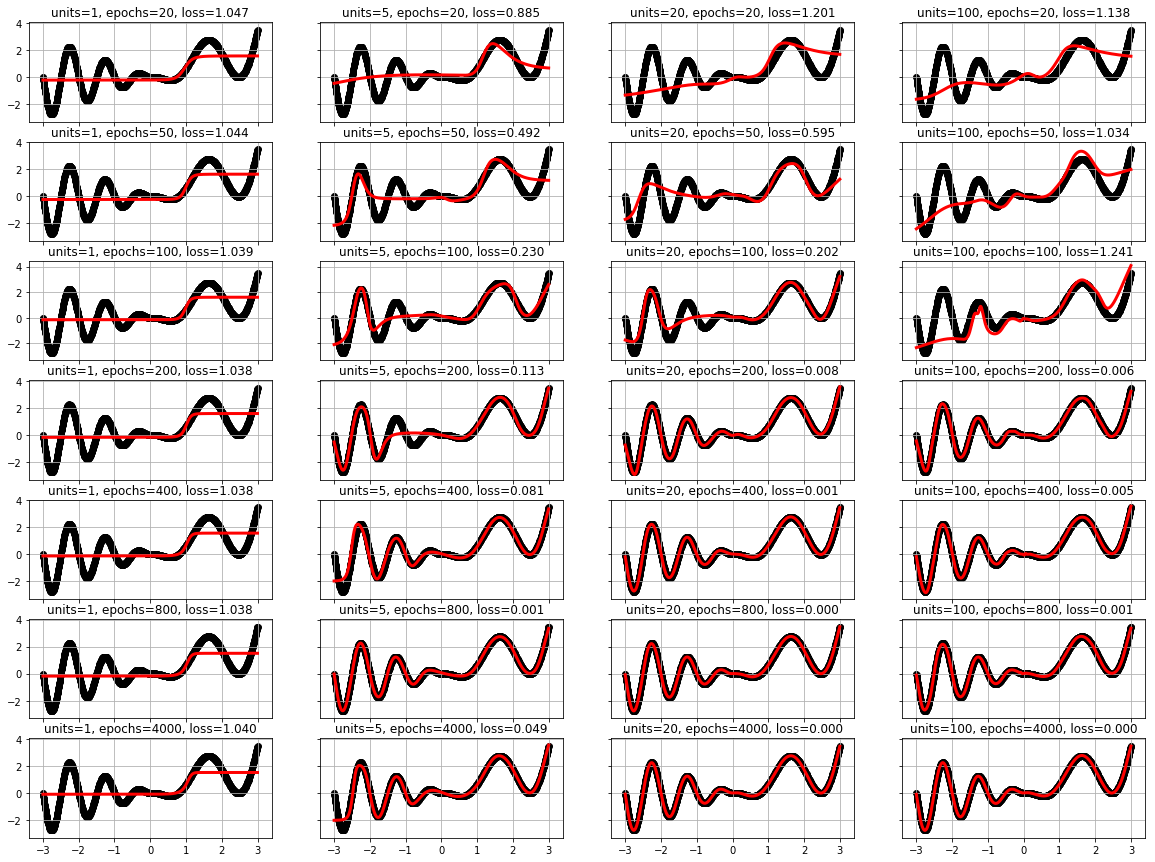

In [5]:
n_epochs = [20,50,100,200,400,800,4000]
n_units = [1,5,20,100]

fig, ax = plt.subplots(len(n_epochs), len(n_units), sharex='col', sharey='row', figsize=(20, 15))

for col, units in enumerate(n_units):
    for row, epochs in enumerate(n_epochs):
        run_model(ax[row, col], x, y, units, epochs)        